In [1]:
import pandas

In [2]:
import re

In [5]:
with open("data/adult.names") as an:
    print(re.findall('([a-z]+): .+', an.read()))

['onor', 'mail', 'lassifiers', 'ayes', 'age', 'workclass', 'fnlwgt', 'education', 'num', 'status', 'occupation', 'relationship', 'race', 'sex', 'gain', 'loss', 'week', 'country']


In [6]:
vn = ['age', 'workclass', 'fnlwgt', 'education',
      'num', 'status', 'occupation', 'relationship',
      'race', 'sex', 'gain', 'loss', 'week', 'country', 'income']

In [7]:
data = pandas.read_csv("data/adult.data.gz", names=vn)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           32561 non-null  int64 
 1   workclass     32561 non-null  object
 2   fnlwgt        32561 non-null  int64 
 3   education     32561 non-null  object
 4   num           32561 non-null  int64 
 5   status        32561 non-null  object
 6   occupation    32561 non-null  object
 7   relationship  32561 non-null  object
 8   race          32561 non-null  object
 9   sex           32561 non-null  object
 10  gain          32561 non-null  int64 
 11  loss          32561 non-null  int64 
 12  week          32561 non-null  int64 
 13  country       32561 non-null  object
 14  income        32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [9]:
data.describe()

,age,fnlwgt,num,gain,loss,week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [10]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [11]:
data['income']

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
32556     <=50K
32557      >50K
32558     <=50K
32559     <=50K
32560      >50K
Name: income, Length: 32561, dtype: object

In [12]:
from sklearn.feature_selection import SelectKBest, VarianceThreshold, chi2
from sklearn.pipeline import Pipeline

In [13]:
y = 1*(data['income'] == " >50K")

In [14]:
del data['fnlwgt']

In [15]:
feature_selector = Pipeline([('vt', VarianceThreshold(0.2*(1 - 0.2))),
                             #('skb', SelectKBest(chi2, k=10))
                            ])
feat = ['age', 'sex', 'gain', 'loss', 'relationship', 'num', 'education', 'week']
X = feature_selector.fit_transform(pandas.get_dummies(data[feat].iloc[:,:-1], drop_first=True), y)

In [16]:
X = pandas.DataFrame(X, columns=feature_selector.get_feature_names_out())
X['const'] = 1

In [17]:
X.describe()

,age,gain,loss,num,sex_ Male,relationship_ Not-in-family,education_ HS-grad,education_ Some-college,const
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.0
mean,38.581647,1077.648844,87.303830,10.080679,0.669205,0.255060,0.322502,0.223918,1.0
std,13.640433,7385.292085,402.960219,2.572720,0.470506,0.435901,0.467441,0.416874,0.0
min,17.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,28.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,37.000000,0.000000,0.000000,10.000000,1.000000,0.000000,0.000000,0.000000,1.0
75%,48.000000,0.000000,0.000000,12.000000,1.000000,1.000000,1.000000,0.000000,1.0
max,90.000000,99999.000000,4356.000000,16.000000,1.000000,1.000000,1.000000,1.000000,1.0


In [18]:
logit = sm.Logit(y, X).fit()
logit.summary2()

Optimization terminated successfully.
         Current function value: 0.382813
         Iterations 8


<class 'statsmodels.iolib.summary2.Summary'>
"""
                               Results: Logit
============================================================================
Model:                   Logit               Pseudo R-squared:    0.307     
Dependent Variable:      income              AIC:                 24947.5370
Date:                    2022-08-15 21:08    BIC:                 25023.0548
No. Observations:        32561               Log-Likelihood:      -12465.   
Df Model:                8                   LL-Null:             -17974.   
Df Residuals:            32552               LLR p-value:         0.0000    
Converged:               1.0000              Scale:               1.0000    
No. Iterations:          8.0000                                             
----------------------------------------------------------------------------
                             Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------------
age                          0.0387   0.0012  31.3296 0.0000  0.0363  0.0411
gain                         0.0003   0.0000  33.7857 0.0000  0.0003  0.0003
loss                         0.0007   0.0000  21.3165 0.0000  0.0007  0.0008
num                          0.3802   0.0096  39.7356 0.0000  0.3615  0.3990
sex_ Male                    1.1104   0.0403  27.5867 0.0000  1.0315  1.1893
relationship_ Not-in-family -1.4934   0.0474 -31.5373 0.0000 -1.5862 -1.4006
education_ HS-grad           0.0219   0.0488   0.4484 0.6539 -0.0738  0.1176
education_ Some-college      0.0690   0.0465   1.4861 0.1372 -0.0220  0.1601
const                       -7.5890   0.1377 -55.1187 0.0000 -7.8589 -7.3191
============================================================================

"""

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
del X['const']

In [21]:
sk_m = LogisticRegression(penalty='none', max_iter=1_000).fit(X, y)

In [22]:
sk_m.coef_

array([[ 3.86323124e-02,  3.29000041e-04,  7.20754258e-04,
         3.77425329e-01,  1.13527758e+00, -1.46738253e+00,
         4.67243357e-03,  5.16585268e-02]])

In [23]:
from dataclasses import dataclass

In [24]:
@dataclass
class BootSampler:
    
    k: int = 1000
    
    def sample(self, *args):
        idx = args[0].sample(self.k, replace=True).index
        return [a.loc[idx] for a in args]

In [25]:
coefs = [LogisticRegression(penalty='none', max_iter=1_000).fit(*BootSampler().sample(X, y)).coef_
         for _ in range(1000)]

In [26]:
import matplotlib.pyplot as plt

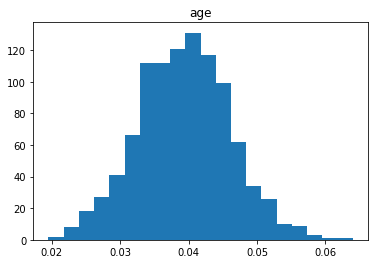

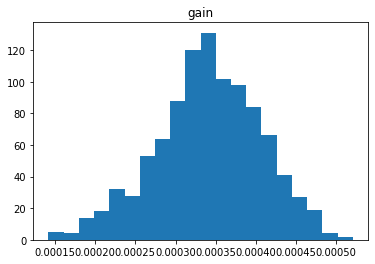

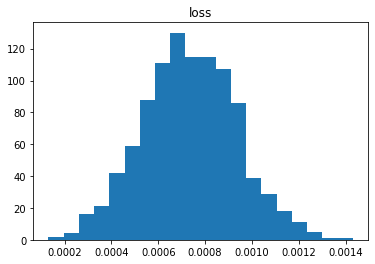

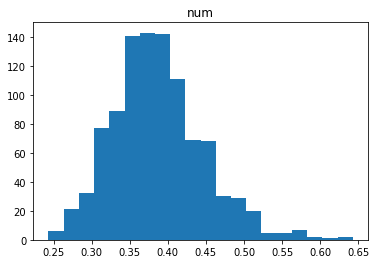

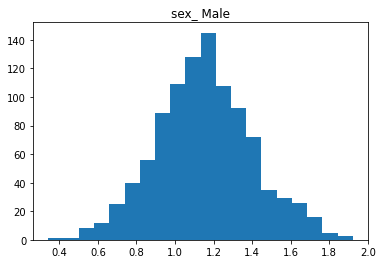

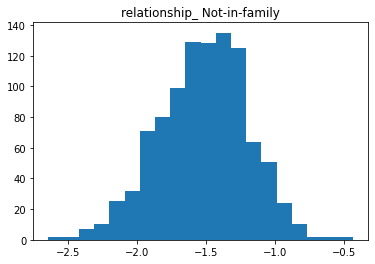

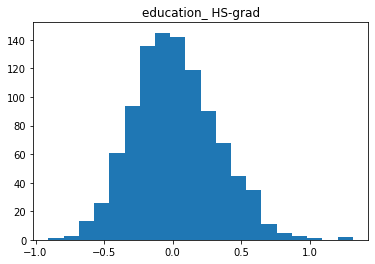

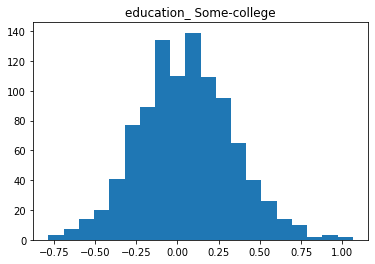

<Figure size 432x288 with 0 Axes>

In [27]:
for i, n in enumerate(X):
    plt.hist([c[0][i] for c in coefs], bins=20)
    plt.title(n)
    plt.figure()
None

In [32]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [45]:
tree_model = DecisionTreeClassifier(max_depth=3).fit(X, y)

In [46]:
import matplotlib.pyplot as plt

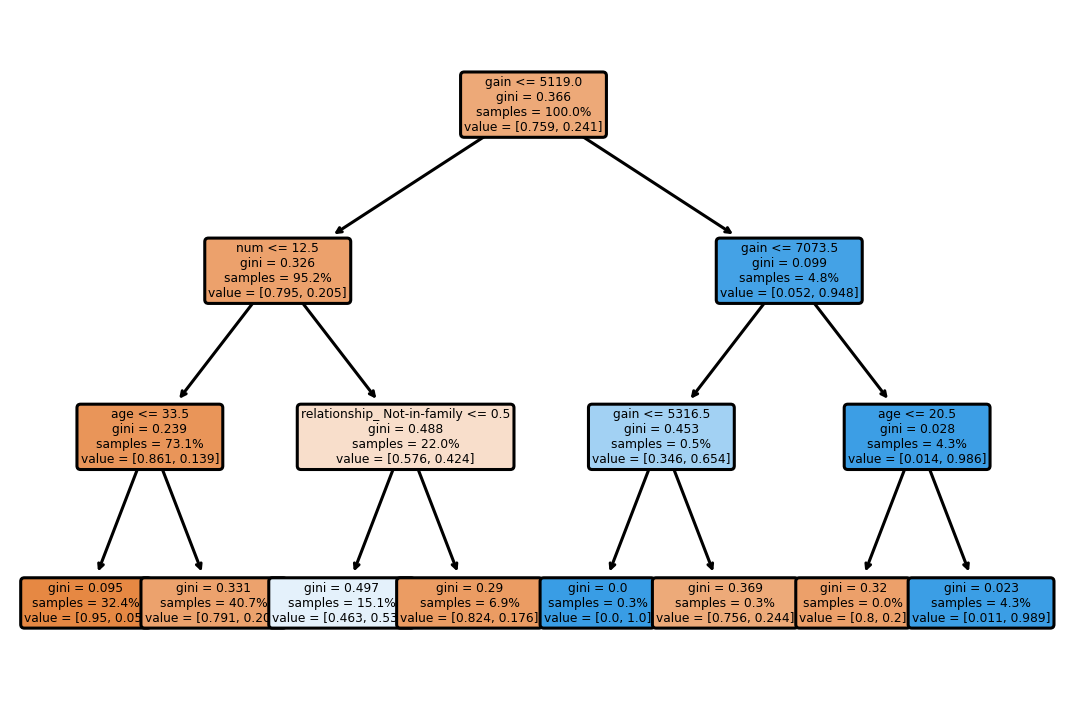

In [62]:
plt.figure(dpi=220)
plot_tree(tree_model, fontsize=4,
          filled=True, feature_names=X.columns,
          rounded=True, proportion=True)
None

In [63]:
import shap

In [64]:
shap.initjs()

In [65]:
def model_adult_proba(x):
    return sk_m.predict_proba(x)[:,1]
def model_adult_log_odds(x):
    p = sk_m.predict_log_proba(x)
    return p[:,1] - p[:,0]

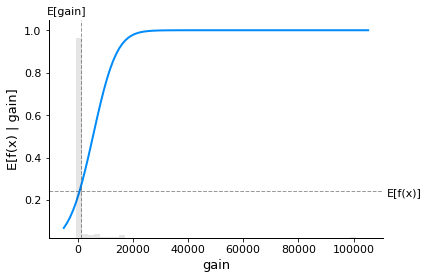

In [66]:
# make a standard partial dependence plot
sample_ind = 18
fig,ax = shap.partial_dependence_plot(
    "gain", model_adult_proba, X, model_expected_value=True,
    feature_expected_value=True, show=False, ice=False
)


In [67]:
background_adult = shap.maskers.Independent(X, max_samples=100)
explainer = shap.Explainer(model_adult_proba, background_adult)
shap_values_adult = explainer(X[:1000])

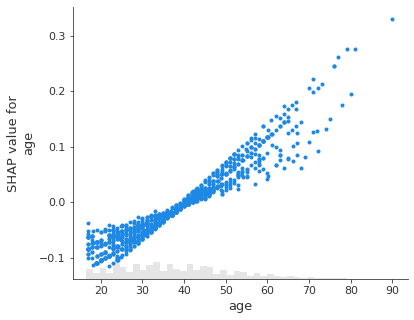

In [68]:
shap.plots.scatter(shap_values_adult[:,"age"])

In [69]:
explainer_log_odds = shap.Explainer(model_adult_log_odds, background_adult)
shap_values_adult_log_odds = explainer_log_odds(X[:1000])

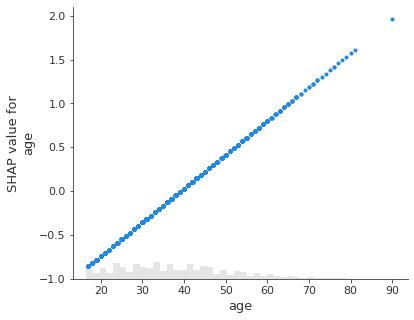

In [73]:
shap.plots.scatter(shap_values_adult_log_odds[:,"age"])

In [74]:
sk_ex = shap.LinearExplainer(sk_m, X)

In [75]:
sk_shap_values = sk_ex(X)

In [78]:
shap.force_plot(shap_values_adult[10])

In [77]:
X.iloc[10]

age                            37
gain                            0
loss                            0
num                            10
sex_ Male                       1
relationship_ Not-in-family     0
education_ HS-grad              0
education_ Some-college         1
Name: 10, dtype: int64

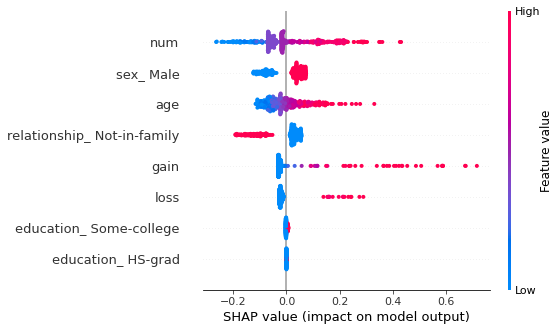

In [79]:
shap.summary_plot(shap_values_adult.sample(500))

In [192]:
import xgboost

In [193]:
model = xgboost.XGBClassifier(n_estimators=100, max_depth=2, eval_metric="logloss").fit(X, y*1)

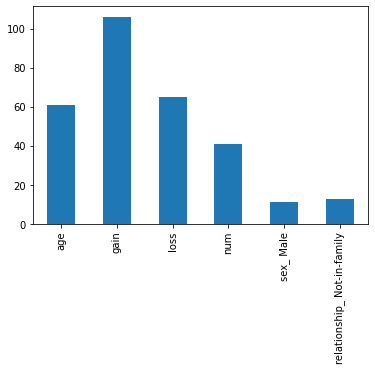

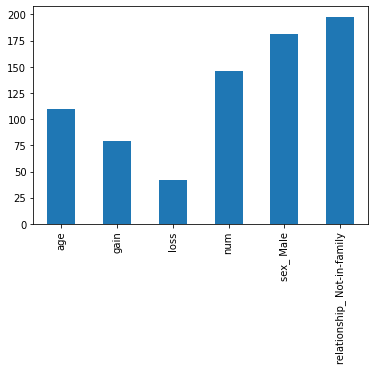

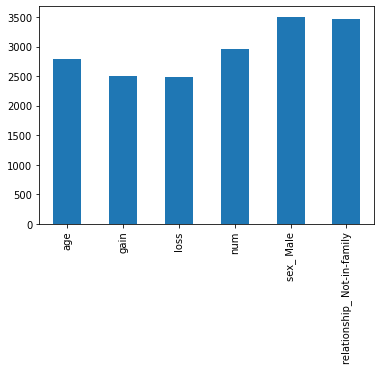

<Figure size 432x288 with 0 Axes>

In [194]:
for t in ['weight', 'gain', 'cover']:
    pandas.Series(model.get_booster().get_score(importance_type=t)).plot.bar()
    plt.figure()

In [195]:
xg_explainer = shap.Explainer(model, X)
xg_shap_values = explainer(X.sample(500))

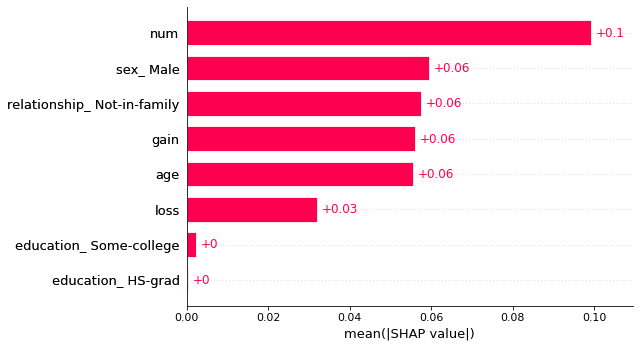

In [196]:
shap.plots.bar(xg_shap_values)

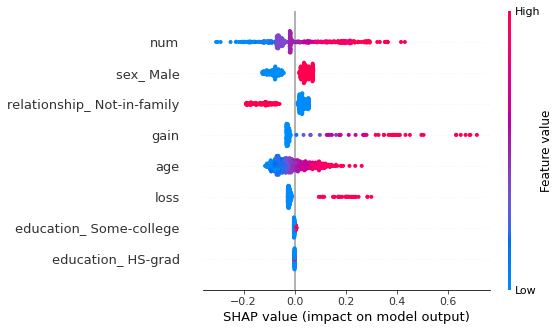

In [197]:
shap.summary_plot(xg_shap_values.sample(1000))

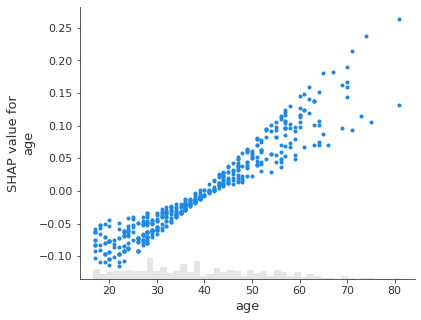

In [198]:
shap.plots.scatter(xg_shap_values[:,"age"])